In [1]:
##This script will plot genotypes vs expression for a given gene and variant SNP or STR position
##You have to know which chromosome the pair (gene-var) belongs to.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

def plotthat(Frame, BASEDIR):
    chs = list(Frame['chrom'])[0]
    gene = list(Frame['gene'])[0]
    start = list(Frame['best.str.start'])[0]
    tissue = list(Frame['best.tissue'])[0]
    score = list(Frame['best.score'])[0]
    
    snps=pd.read_csv(BASEDIR+tissue+"/SNP_Analysis/PQValues", sep="\t",low_memory=False)
    expr = pd.read_csv(BASEDIR+tissue+"/Corr_Expr.csv",sep=',' ,low_memory=False) 
    snp =pd.read_csv(SNPS+"/"+chs+'.tab', sep='\t',low_memory=False) #snps
    Genos=pd.read_csv(STRS, sep='\t',low_memory=False)
    #gene name
    S = snps.loc[snps['gene']==gene]['str.start']; S=int(S)
    Gene = Gene_table.loc[Gene_table['gene']==gene]['gene.name'].values[0]
    print('\n----->',chs,' gene ',gene,'(',Gene,')  Causality Score: ',score,'\nCounts by SNP genotypes')
    
    #restrict to samples
    samples = list(expr.index)
    Genosnp = snp.loc[snp['start']==S,samples]
    Genostr = Genos.loc[Genos['start']==start, samples]
    Genosnp = Genosnp.replace('None', np.nan) ; #print(Genosnp)
    Genostr = Genostr.replace('None', np.nan) ; #print(Genostr)
    #Expression
    Expr = expr[gene]
    
    #Figure    (1) STR vs EXPR
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.title(tissue+' tissue')
    plt.scatter(Genosnp, Expr, label='Lead SNP', color='b',marker='.')
    plt.ylabel(Gene+' expression')
    plt.xlabel('Best SNP genotypes')
    plt.subplot(132)
    plt.scatter(Genostr, Expr,label='eSTR', color='g',marker='.', s=10)
    #plt.ylabel(Gene+' Gene expression')
    plt.xlabel('eSTR genotypes \nSTR_'+str(int(start)))

    #Figure (2) Hold snp genotypes constant
    geno=list(set(Genosnp.values.tolist()[0]))
    geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
    n=len(geno) ; N=0
    ind=Genosnp.index[0]
    #fig = plt.figure(figsize=(8,6))
    xx=[]; hh=[]
    plt.subplot(133) #
    for i in range(n):
        S = Genosnp.T.loc[Genosnp.T[ind]==geno[i]]
        sample=list(S.index)
        S['Exp']=Expr.loc[sample]
        S['Str']=Genostr.T.loc[sample][Genostr.index[0]]
        #print(N, list(S['Str']))
        S['Str'] = S['Str'].astype(float)
        S['Str']+=N
        if len(S['Exp'])==0:
            continue
        #ax = fig.add_subplot(n,1,1+i)
        plt.scatter(list(S['Str']), list(S['Exp']), color=COLOR[i], marker='.',s=8)
#        plt.title.set_text(Gene+' Expression @ SNP_genotype='+str(geno[i])+' ( n='+str(len(S['Exp']))+' )')
        w=np.nanmax(list(S['Str'].values))-np.nanmin(list(S['Str'].values))
        xx.append(w/2)
        hh.append(str(geno[i]))
        if w!=0:
            N += np.nanmax(list(S['Str'].values))-np.nanmin(list(S['Str'].values))+10
        else:
            N +=np.nanmax(list(S['Str'].values))+10
        print(i, w, N, geno[i], S.shape)
        #print(N, list(S['Str']))
    plt.title('STRs at SNPs genotypes \nSTR_'+str(int(start)))
    #plt.xticks(xx)
    # plt.label(hh, rotation=45, color='blue')
    plt.show()
#END 
COLOR = ['b', 'm', 'g', 'k', 'y', 'r', 'grey']

T = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Adipose-Subcutaneous','Artery-Tibial','Esophagus-Mucosa']
BASEDIR = "/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/"
SNPS = "/storage/szfeupe/Runs/650GTEx_estr/SNP_Analysis/"
STRS = "/storage/szfeupe/Runs/650GTEx_estr/Genotypes/STR_Norm_lized_Geno.table"
GENO = pd.read_csv(STRS, sep='\t',low_memory=False)
Gene_table = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/FEATURES/Genes_only_table', sep='\t')


In [2]:
chs = 'chr21'
tissue = 'Thyroid'
snps=pd.read_csv(BASEDIR+tissue+"/SNP_Analysis/PQValues", sep="\t",low_memory=False)
expr = pd.read_csv(BASEDIR+tissue+"/Corr_Expr.csv",sep=',' ,low_memory=False) 
snp =pd.read_csv(SNPS+chs+".tab", sep='\t',low_memory=False) #snps

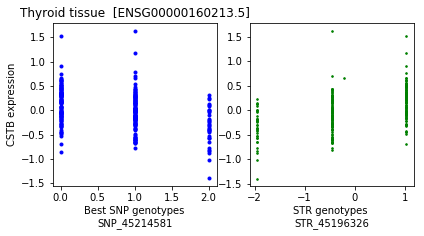

In [3]:
gene = 'ENSG00000160213.5'
start = 45196326



Genos=GENO.loc[GENO['chrom']==chs]
#gene name
S = snps.loc[snps['gene']==gene]['str.start']; S=int(S)
Gene = Gene_table.loc[Gene_table['gene']==gene]['gene.name'].values[0]

#restrict to samples
samples = list(expr.index)
Genosnp = snp.loc[snp['start']==S,samples]
Genostr = Genos.loc[Genos['start']==start, samples]
Genosnp = Genosnp.replace('None', np.nan) ; #print(Genosnp)cd ../
Genostr = Genostr.replace('None', np.nan) ; #print(Genostr)
#Expression
Expr = expr[gene]

#Figure    (1) STR vs EXPR
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.title(tissue+' tissue  ['+gene+']')
plt.scatter(Genosnp, Expr, label='Lead SNP', color='b',marker='.')
plt.ylabel(Gene+' expression')
plt.xlabel('Best SNP genotypes\nSNP_'+str(S))
plt.subplot(132)
plt.scatter(Genostr, Expr,label='eSTR', color='g',marker='.', s=10)
#plt.ylabel(Gene+' Gene expression')
plt.xlabel('STR genotypes \nSTR_'+str(int(start)))
plt.show()


-----> chr21  gene  ENSG00000160213.5 ( CSTB )  Causality Score:  0.9999969999999999 
Counts by SNP genotypes
0 2.972587660213498 12.972587660213499 0 (104, 3)
1 2.972587660213499 25.945175320426998 1 (124, 3)
2 2.9725876602134953 38.91776298064049 2 (34, 3)


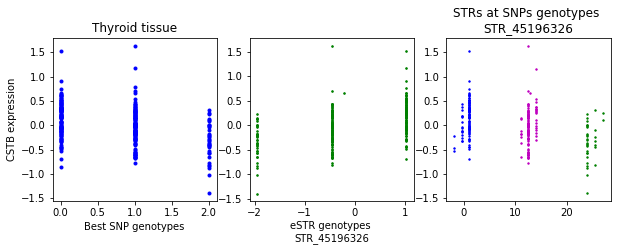

In [38]:
#q = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table',sep='\t')
#frame = q.loc[q['gene']==gene]
plotthat(frame, BASEDIR)

In [37]:
#(S, i, w, N, geno[i], S.shape)


In [ ]:
ax2.xaxis.set_ticks_position("bottom")
ax2.spines["bottom"].set_visible(True)
ax2.set_xticks([-50,50])
ax2.set_xticklabels(['Line 1', 'Line 2'], rotation=45, color='blue')
